# Twitter

### Pre-processing

TODO
- none

Find the most recent dataset and load it

In [5]:
import pandas as pd
import numpy as np
import os

'''
path = "data"

# get the most recent dataset (ordered by the date in the name)
filelist = os.listdir("data") # get the list of files
matching = [s for s in filelist if "dataset" in s] # filter only by files containing "dataset" in the name
matching.sort(reverse=True)

print(matching[0])

# load the dataset
df = pd.read_csv(path+"/"+matching[0])
df = df.rename(columns={"Text": "text", "Retweet": "retweet", "Likes": "likes", 3: "user_id"})
'''

'\npath = "data"\n\n# get the most recent dataset (ordered by the date in the name)\nfilelist = os.listdir("data") # get the list of files\nmatching = [s for s in filelist if "dataset" in s] # filter only by files containing "dataset" in the name\nmatching.sort(reverse=True)\n\nprint(matching[0])\n\n# load the dataset\ndf = pd.read_csv(path+"/"+matching[0])\ndf = df.rename(columns={"Text": "text", "Retweet": "retweet", "Likes": "likes", 3: "user_id"})\n'

In [195]:
#path = "datasets/619439/"
path = "datasets/710527/"
#path = ""
#df = pd.read_csv(path+"debug_set_614548.csv")
#df = pd.read_csv(path+"debug_set_619439.csv")
#df = pd.read_csv(path+"dataset_pop.csv")
df = pd.read_csv(path+"dataset_pop-by-likes.csv")
#df = pd.read_csv(path+"dataset_raw.csv")


#path = "datasets/619439/"
#df = pd.concat([df, pd.read_csv(path+"dataset_pop.csv")])
df = df.rename(columns={"text": "X", "pop_level": "y"})
display(df)

,X,likes,impressions,followers,popularity,y
0,"Reduce your cravings, or better yet, replace w...",0.0,58.0,1873.0,0.278652,0
1,3 hours in the lunch tent now going home 🤪,0.0,70.0,252.0,0.431823,0
2,I could really use a glass of melted ice cream...,0.0,7.0,93.0,0.494803,0
3,Gonna sustain a healthy diet over my days off ...,1.0,46.0,43.0,1.091426,1
4,i need the trans of what chanyeol said in the ...,0.0,66.0,753.0,0.355813,0
...,...,...,...,...,...,...
6065,Vanilla hulk from smoothie king never disappoints,1.0,125.0,243.0,0.868310,1
6066,Finally going to eat my instant ramen.....I wa...,1.0,30.0,79.0,1.010513,1
6067,Been up since 7 am everyone else still sleep…....,0.0,85.0,371.0,0.406460,0
6068,NOOOOOO I meant to buy a six pack of diet soda...,1.0,42.0,131.0,0.946309,1


#### Clean
Drop duplicates observations

In [196]:
# drop duplicates observations, keeping the first occurrence
df = df.drop_duplicates(subset='X', keep='first')
print(df.shape)
display(df)

(6003, 6)


,X,likes,impressions,followers,popularity,y
0,"Reduce your cravings, or better yet, replace w...",0.0,58.0,1873.0,0.278652,0
1,3 hours in the lunch tent now going home 🤪,0.0,70.0,252.0,0.431823,0
2,I could really use a glass of melted ice cream...,0.0,7.0,93.0,0.494803,0
3,Gonna sustain a healthy diet over my days off ...,1.0,46.0,43.0,1.091426,1
4,i need the trans of what chanyeol said in the ...,0.0,66.0,753.0,0.355813,0
...,...,...,...,...,...,...
6065,Vanilla hulk from smoothie king never disappoints,1.0,125.0,243.0,0.868310,1
6066,Finally going to eat my instant ramen.....I wa...,1.0,30.0,79.0,1.010513,1
6067,Been up since 7 am everyone else still sleep…....,0.0,85.0,371.0,0.406460,0
6068,NOOOOOO I meant to buy a six pack of diet soda...,1.0,42.0,131.0,0.946309,1


Generate response variable

### Training Test Split

In [197]:
from sklearn.model_selection import train_test_split

sec_col = 'popularity'
y_col = ['y', sec_col] ####
####y_col = ['y'] ####
X_cols = df.columns
X_cols = X_cols.drop(y_col)

X_cols = X_cols.drop('likes')
X_cols = X_cols.drop('followers')
X_cols = X_cols.drop('impressions')
#X_cols = X_cols.drop('popularity') ####

print(X_cols)

# split data
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:,X_cols], df.loc[:,y_col], test_size=0.2, random_state=0, shuffle=True, stratify=df.loc[:,'y'])

# REVIEW THIS:
X_train = X_train['X']
X_test = X_test['X']

# backup
X_train_bak = X_train
X_test_bak = X_test

y_train_reg = y_train[sec_col]
y_test_reg = y_test[sec_col]

y_train_clf = y_train['y']
y_test_clf = y_test['y']

display(X_train)
display(y_train)

Index(['X'], dtype='object')


1086    I was planning to iron my clothes after lunch ...
3339    The recent promotion of jingyalov hats is West...
2480    i'd like to get groovy \nto drink a mango smoo...
5258    I’m moving outta Houston I’m really gonna miss...
2221      is it “diet culture” or is it eating healthy? 🙂
                              ...                        
1834             eat your lunch na guys ikaw den isa wink
2180    i had half a sandwich for lunch but idk the ca...
3034    Man someone lock in the gym with me 3-4 days a...
1838    Tomo how was your lunch today I bet you enjoye...
738     Fellas, I needed to get out of here for a whil...
Name: X, Length: 4802, dtype: object

,y,popularity
1086,0,0.335837
3339,0,0.293152
2480,0,0.431062
5258,2,3.531759
2221,2,58.286067
...,...,...
1834,0,0.339583
2180,1,1.860279
3034,0,0.296381
1838,2,3.408680


In [198]:
# SET CLASSIFICATION
y_train = y_train_clf
y_test = y_test_clf

#### Stemming
We can further improve our bag-of-words pre-processing using a normalization technique called stemming.
The idea is to reduce each word to its stem, using the stemming algorithm (rule-based heuristic).
For example a stemmer reduce words like "climber", "climbed" and "climbing" to "climb".

The Natural Language Toolkit for Python (NLTK, http://www.nltk.org) implements the Snowball stemming algorithm.

#### Bag-of-Words

Is used the scikit-learn implementation of bag of word using the CountVectorizer class.
It take an array of text as input and return a bag-of-words model.

##### Less frequently words
To lower the dimension we can clean the words that appears less frequently, is used the "min_df" to set the minimum number of documents that the word needs to appear in.



In [199]:
# prepare tokenization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

# create a function to 
def tokenizer_snowballStemmer(text):
    return [stemmer.stem(word) for word in text.split()]

tokenizer_snowballStemmer("The pink sweater fit her perfectly") # test

['the', 'pink', 'sweater', 'fit', 'her', 'perfect']

Bag of word

In [200]:
from sklearn.feature_extraction.text import CountVectorizer

def prep_bagofword(X_train, X_test):
    count = CountVectorizer(tokenizer = tokenizer_snowballStemmer, min_df=5) # use tokenizer function
    count.fit(X_train) # generate Bag-of-words

    #print("Vocabulary size using stemming: {}". format(len(count.vocabulary_)))
    #print("Vocabulary content:\n {}".format(count.vocabulary_))

    # apply transformation to the data
    X_train = count.transform(X_train)
    print("X_train: {}".format(X_train.shape))

    X_test = count.transform(X_test)
    print("X_test: {}".format(X_test.shape))
    
    feature_names = np.array(count.get_feature_names())
    
    return X_train, X_test, feature_names


Better use bag of word + TF-IDF

REFs 
https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py

In [227]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time

def prep_bagofword_tfidf(X_train, X_test):
    vectorizer = TfidfVectorizer(
        tokenizer = tokenizer_snowballStemmer,
        #max_df=0.01,
        min_df=5,
        #ngram_range=(1,5),
        stop_words="english")

    t0 = time.time()
    vectorizer.fit(X_train)
    X_train = vectorizer.transform(X_train)
    print(f"vectorization done in {time.time() - t0:.3f} s")

    print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
    print(f"{X_train.nnz / np.prod(X_train.shape):.3f}")

    #print("Vocabulary size using stemming: {}". format(len(count.vocabulary_)))
    #print("Vocabulary content:\n {}".format(vectorizer.vocabulary_))

    # apply transformation to the tesr
    X_test = vectorizer.transform(X_test)
    print("X_test: {}".format(X_test.shape))

    feature_names = np.array(vectorizer.get_feature_names())
    
    return X_train, X_test, features_names

Main preprocessing function

In [228]:
# update the variables
#X_train = X_train_bak
#X_test = X_test_bak

# select steps to apply
#X_train, X_test, features_names = prep_bagofword(X_train, X_test)

# update the variables
X_train = X_train_bak
X_test = X_test_bak

X_train, X_test, features_names = prep_bagofword_tfidf(X_train, X_test)

# in case of classification
target_names = [0, 1 ,2]
display(target_names)

/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi

vectorization done in 2.078 s
n_samples: 4802, n_features: 1723
0.005
X_test: (1201, 1723)


/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[0, 1, 2]

### GridSearchCV

In [99]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':('100', '200'), 'C':[1, 10]}
clf = make_pipeline(StandardScaler(), 
                    GridSearchCV(LogisticRegression(),
                                 param_grid={'logisticregression__C': [0.1, 10.]},
                                 cv=2,
                                 refit=True))

clf.fit()
clf.predict()
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)


sorted(clf.cv_results_.keys())
'''

NameError: name 'make_pipeline' is not defined

### Modeling

In [220]:
from sklearn.ensemble import RandomForestClassifier

def model_randomforest(X_train, y_train):
    # fit a Random Forest model
    clf_empty = RandomForestClassifier(n_estimators=100)
    clf_fitted = clf_empty.fit(X_train, y_train) 
    return clf_empty, clf_fitted

Check the model performance using cross validation (on the training set) and show the accuracy results.

In [221]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def eval_cv_classification(clf, X_train, y_train):
    # plot CV results
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='balanced_accuracy')
    display("Cross Validation scores")
    i=1
    for a in scores:
        display("Accuracy cv=" + str(i) + ": " + str(round(a*100, 2)))
        i = i+1
    acc_mean = round(scores.mean(),2)*100
    display("Accuracy MEAN: "+str(acc_mean))
    return scores.mean()

In [222]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score

def eval_pred_classification(clf, X_test, y_test):
    # results on test set
    predictions = clf.predict(X_test)
    test_accuracy = balanced_accuracy_score(predictions, y_test)
    display("Test set accuracy: " + str(round(test_accuracy*100, 2)))
    display(confusion_matrix(predictions, y_test)) # display confusion matrix

    # results on test set
    predictions = clf.predict(X_test)
    test_accuracy = balanced_accuracy_score(predictions, y_test)
    display("Test set accuracy: " + str(round(test_accuracy*100, 2)))

    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()

    fig = disp.ax_.get_figure()
    fig.set_figwidth(2)
    fig.set_figheight(2)

    plt.title("Test set results")
    plt.show()

'Cross Validation scores'

'Accuracy cv=1: 36.11'

'Accuracy cv=2: 36.57'

'Accuracy cv=3: 36.2'

'Accuracy cv=4: 35.28'

'Accuracy cv=5: 34.8'

'Accuracy MEAN: 36.0'

'Test set accuracy: 43.57'

array([[345, 254, 120],
       [171, 191,  85],
       [  8,  13,  14]])

'Test set accuracy: 43.57'

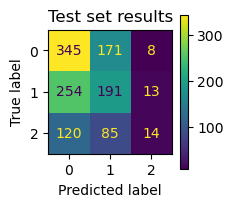

In [229]:
# get model
clf_empty, clf_fitted = model_randomforest(X_train, y_train)

# Cross Validation
eval_cv_classification(clf_empty, X_train, y_train)

# validation set
eval_pred_classification(clf_fitted, X_test, y_test)

## Benchmarking

Benchmarking function

In [18]:
from sklearn.utils.extmath import density
from sklearn import metrics

def benchmark(clf, custom_name=False):
    
    score_cv = eval_cv_classification(clf, X_train, y_train)
    
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time.time()
    pred = clf.predict(X_test)
    test_time = time.time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")

    if hasattr(clf, "coef_"):
        print(f"dimensionality: {clf.coef_.shape[1]}")
        print(f"density: {density(clf.coef_)}")
        print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
        
    return clf_descr, score, train_time, test_time, score_cv

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

results = []
for clf, name in (
    (LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    # L2 penalty Linear SVC
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    # Sparse naive Bayes classifier
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Logistic Regression


'Cross Validation scores'

'Accuracy cv=1: 47.72'

'Accuracy cv=2: 47.48'

'Accuracy cv=3: 49.16'

'Accuracy cv=4: 47.07'

'Accuracy cv=5: 47.48'

'Accuracy MEAN: 48.0'

________________________________________________________________________________
Training: 
LogisticRegression(C=5, max_iter=1000)
train time: 0.579s
test time:  0.000392s
accuracy:   0.463
dimensionality: 2426
density: 1.0


kNN


/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

'Cross Validation scores'

'Accuracy cv=1: 50.2'

'Accuracy cv=2: 50.24'

'Accuracy cv=3: 51.31'

'Accuracy cv=4: 48.76'

'Accuracy cv=5: 48.42'

'Accuracy MEAN: 50.0'

________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=100)
train time: 0.0014s


/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


test time:  0.333s
accuracy:   0.485

Random Forest


'Cross Validation scores'

'Accuracy cv=1: 52.35'

'Accuracy cv=2: 51.71'

'Accuracy cv=3: 53.67'

'Accuracy cv=4: 51.85'

'Accuracy cv=5: 50.84'

'Accuracy MEAN: 52.0'

________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 3.92s
test time:  0.221s
accuracy:   0.476

Linear SVC


'Cross Validation scores'

'Accuracy cv=1: 51.14'

'Accuracy cv=2: 51.11'

'Accuracy cv=3: 51.45'

'Accuracy cv=4: 49.97'

'Accuracy cv=5: 50.57'

'Accuracy MEAN: 51.0'

________________________________________________________________________________
Training: 
LinearSVC(C=0.1, dual=False)
train time: 0.0358s
test time:  0.000263s
accuracy:   0.501
dimensionality: 2426
density: 1.0


Complement naive Bayes


'Cross Validation scores'

'Accuracy cv=1: 46.24'

'Accuracy cv=2: 44.18'

'Accuracy cv=3: 45.06'

'Accuracy cv=4: 43.04'

'Accuracy cv=5: 43.91'

'Accuracy MEAN: 44.0'

________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1)
train time: 0.0031s
test time:  0.000216s
accuracy:   0.434
dimensionality: 2426
density: 1.0




/Users/agustin/miniforge3/envs/dssc-deep/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


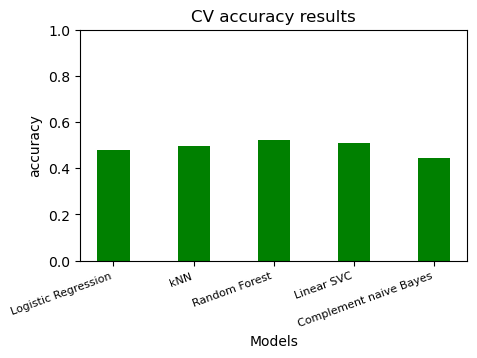

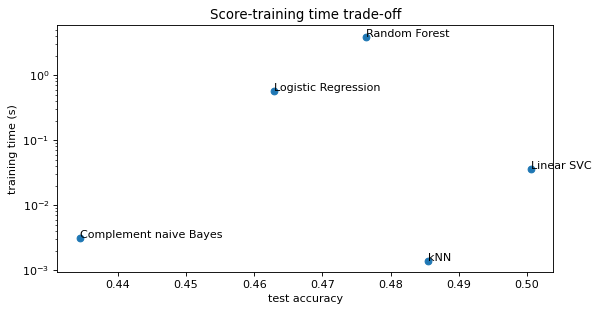

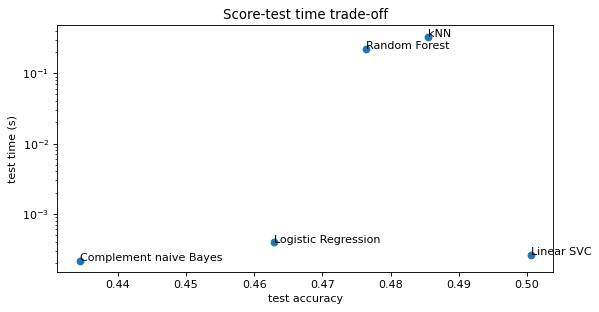

In [20]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(5)]

clf_names, score, training_time, test_time, score_cv = results
training_time = np.array(training_time)
test_time = np.array(test_time)

# accuracy cv

fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
ax = plt.bar(clf_names, score_cv, color ='green', width = 0.4)

plt.xticks(ha='right', rotation=20, fontsize=8)
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("accuracy")
plt.title("CV accuracy results")
plt.show()
    
# accuracy validation
fig, ax1 = plt.subplots(figsize=(8, 4), dpi=80)
ax1.scatter(score, training_time)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
fig, ax2 = plt.subplots(figsize=(8, 4), dpi=80)
ax2.scatter(score, test_time)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (score[i], training_time[i]))
    ax2.annotate(txt, (score[i], test_time[i]))

'Test set accuracy: 43.63'

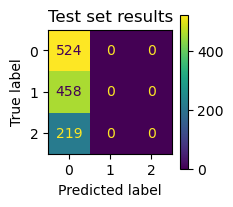

In [212]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# results on test set
predictions = dummy_clf.predict(X_test)
test_accuracy = accuracy_score(predictions, y_test)
display("Test set accuracy: " + str(round(test_accuracy*100, 2)))

cm = confusion_matrix(y_test, predictions, labels=dummy_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dummy_clf.classes_)
disp.plot()

fig = disp.ax_.get_figure()
fig.set_figwidth(2)
fig.set_figheight(2)

plt.title("Test set results")
plt.show()

## Regression

In [192]:
y_train = y_train_reg
y_test = y_test_reg

In [193]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

# plot CV results
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
display("Cross Validation scores on popularity")
i=1
for a in scores:
    display("R^2 cv=" + str(i) + ": " + str(round(a*100, 2)))
    i = i+1

display("R^2 MEAN: "+str(round(scores.mean(),2)*100))

'Cross Validation scores on popularity'

'R^2 cv=1: -1683.71'

'R^2 cv=2: -539.33'

'R^2 cv=3: -1.63'

'R^2 cv=4: -55.76'

'R^2 cv=5: -2.34'

'R^2 MEAN: -457.0'

In [194]:
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVC
#clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
#display(clf.score(X_test, y_test))

clf = DummyRegressor(strategy="mean")
clf.fit(X_train, y_train)

display(clf.score(X_test, y_test))

-0.010550698369114153